CNNs (Convolutional Neural Networks) : CNNs are specialized neural networks designed for processing data with a grid like topology, such as images. Different from fully connected layers in MLPs, in
CNN models, one or multiple convolution layers extract features from input by executing convolution operations.

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 51256279.78it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 2206478.94it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 14063664.49it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 7523905.52it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Epoch [1/5], Step [100/938], Loss: 0.1627
Epoch [1/5], Step [200/938], Loss: 0.1163
Epoch [1/5], Step [300/938], Loss: 0.0409
Epoch [1/5], Step [400/938], Loss: 0.0778
Epoch [1/5], Step [500/938], Loss: 0.0171
Epoch [1/5], Step [600/938], Loss: 0.0506
Epoch [1/5], Step [700/938], Loss: 0.0562
Epoch [1/5], Step [800/938], Loss: 0.2211
Epoch [1/5], Step [900/938], Loss: 0.0991
Test Accuracy of the model on the 10000 test images: 98.51%
Epoch [2/5], Step [100/938], Loss: 0.0132
Epoch [2/5], Step [200/938], Loss: 0.0043
Epoch [2/5], Step [300/938], Loss: 0.2068
Epoch [2/5], Step [400/938], Loss: 0.0386
Epoch [2/5], Step [500/938], Loss: 0.0023
Epoch [2/5], Step [600/938], Loss: 0.0301
Epoch [2/5], Step [700/938], Loss: 0.0044
Epoch [2/5], Step [800/938], Loss: 0.0512
Epoch [2/5], Step [900/938], Loss: 0.1847
Test Accuracy of the model on the 10000 test images: 98.88%
Epoch [3/5], Step [100/938], Loss: 0.0051
Epoch [3/5], Step [200/938], Loss: 0.0159
Epoch [3/5], Step [300/938], Loss: 0.003

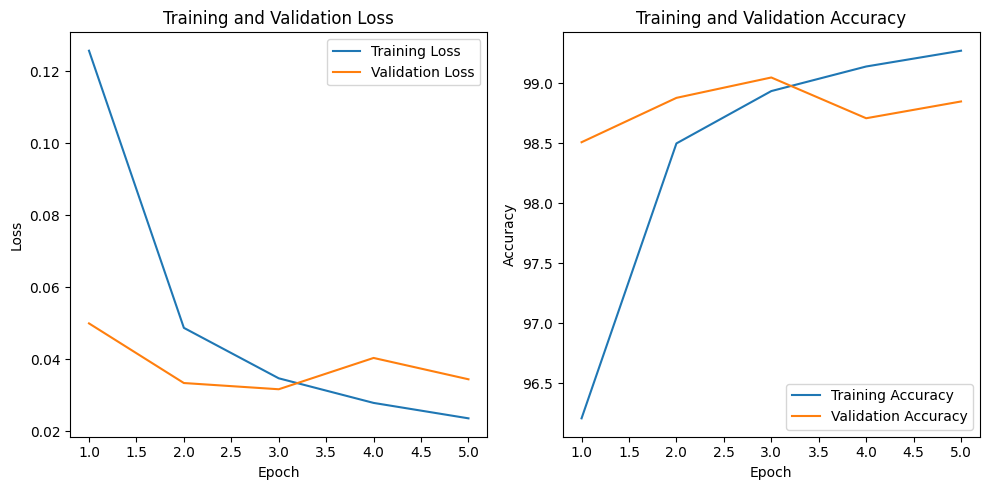

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define the device for training (CPU or GPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyperparameters
num_epochs = 5
batch_size = 64
learning_rate = 0.001

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Convolutional neural network (two convolutional layers)
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.fc1 = nn.Linear(7 * 7 * 64, 1000)
        self.fc2 = nn.Linear(1000, 10)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc1(out)
        out = self.fc2(out)
        return out

model = CNN().to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training history to store metrics
history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    correct = 0
    total = 0
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Track the training loss
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_step}], Loss: {loss.item():.4f}')

    # Calculate training accuracy and loss
    train_loss = running_loss / len(train_loader)
    train_acc = 100 * correct / total

    # Evaluate the model on the test set
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():
        test_loss = 0.0
        correct = 0
        total = 0
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        # Calculate test accuracy and loss
        val_loss = test_loss / len(test_loader)
        val_acc = 100 * correct / total

        # Store the metrics in history
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)

        print(f'Test Accuracy of the model on the {total} test images: {val_acc}%')

# Plot training progress
plt.figure(figsize=(10, 5))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), history['train_loss'], label='Training Loss')
plt.plot(range(1, num_epochs + 1), history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), history['train_acc'], label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')


RNNs (Recurrent Neural Networks) : RNNs are neural networks designed for sequence data, where each node's output is dependent on previous computations. RNNs are suitable for tasks involving sequential data such as time series prediction, natural language processing, and
speech recognition.

Epoch [1/5], Step [100/600], Loss: 0.9456
Epoch [1/5], Step [200/600], Loss: 0.5248
Epoch [1/5], Step [300/600], Loss: 0.4458
Epoch [1/5], Step [400/600], Loss: 0.5531
Epoch [1/5], Step [500/600], Loss: 0.4186
Epoch [1/5], Step [600/600], Loss: 0.2683
Test Accuracy of the model on the 10000 test images: 89.83%
Epoch [2/5], Step [100/600], Loss: 0.4808
Epoch [2/5], Step [200/600], Loss: 0.3142
Epoch [2/5], Step [300/600], Loss: 0.5421
Epoch [2/5], Step [400/600], Loss: 0.2040
Epoch [2/5], Step [500/600], Loss: 0.2949
Epoch [2/5], Step [600/600], Loss: 0.2837
Test Accuracy of the model on the 10000 test images: 93.14%
Epoch [3/5], Step [100/600], Loss: 0.1945
Epoch [3/5], Step [200/600], Loss: 0.3091
Epoch [3/5], Step [300/600], Loss: 0.2067
Epoch [3/5], Step [400/600], Loss: 0.1799
Epoch [3/5], Step [500/600], Loss: 0.1965
Epoch [3/5], Step [600/600], Loss: 0.0633
Test Accuracy of the model on the 10000 test images: 95.41%
Epoch [4/5], Step [100/600], Loss: 0.1612
Epoch [4/5], Step [200

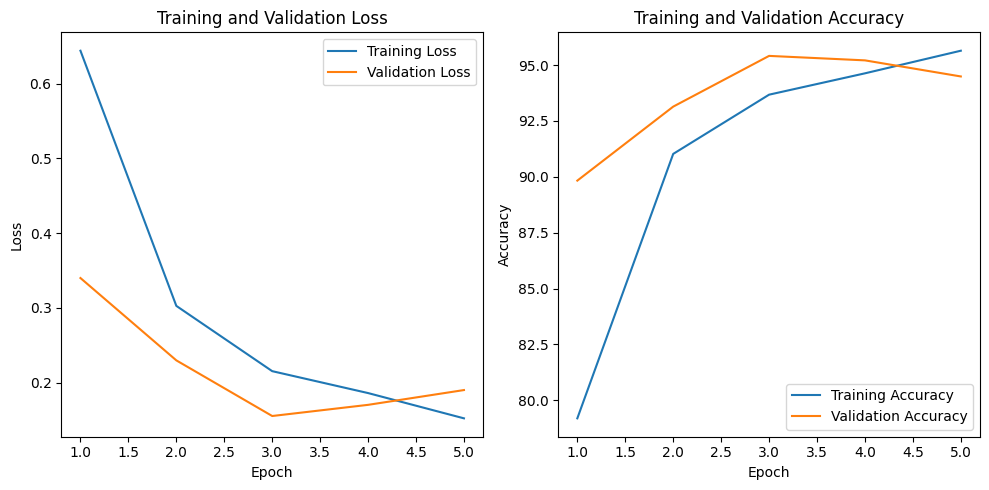

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
sequence_length = 28  # Each image row is treated as a sequence of pixels
input_size = 28  # MNIST data input (img shape: 28*28)
hidden_size = 128  # Hidden size of the RNN
num_layers = 2  # Number of RNN layers
num_classes = 10  # Number of output classes (0-9 digits)
batch_size = 100
num_epochs = 5
learning_rate = 0.001

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data',
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data',
                                          train=False,
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

# Recurrent neural network (many-to-one)
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        # Set initial hidden and cell states
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)

        # Forward propagate RNN
        out, _ = self.rnn(x, h0)

        # Decode the hidden state of the last time step
        out = self.fc(out[:, -1, :])
        return out

model = RNN(input_size, hidden_size, num_layers, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training history to store metrics
history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}

# Training the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    correct = 0
    total = 0
    for i, (images, labels) in enumerate(train_loader):
        images = images[:, 0, :, :]  # Flatten the images (sequence of pixels)
        images = images.reshape(-1, sequence_length, input_size).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Track the training loss
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_step}], Loss: {loss.item():.4f}')

    # Calculate training accuracy and loss
    train_loss = running_loss / len(train_loader)
    train_acc = 100 * correct / total

    # Evaluate the model on the test set
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():
        test_loss = 0.0
        correct = 0
        total = 0
        for images, labels in test_loader:
            images = images[:, 0, :, :]  # Flatten the images (sequence of pixels)
            images = images.reshape(-1, sequence_length, input_size).to(device)
            labels = labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        # Calculate test accuracy and loss
        val_loss = test_loss / len(test_loader)
        val_acc = 100 * correct / total

        # Store the metrics in history
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)

        print(f'Test Accuracy of the model on the {total} test images: {val_acc}%')

# Plot training progress
plt.figure(figsize=(10, 5))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), history['train_loss'], label='Training Loss')
plt.plot(range(1, num_epochs + 1), history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), history['train_acc'], label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Save the model checkpoint
torch.save(model.state_dict(), 'rnn_model.ckpt')


In [1]:
pip install transformers


 Transformers : Transformers are a model architecture designed for handling sequential data
using self-attention mechanisms. They utilize self-attention mechanisms to
process input sequences in parallel, addressing the limitations of recurrent neural
networks (RNNs) in terms of long-range dependencies and computational
efficiency.

In [2]:
import torch
from transformers import BertTokenizer, BertModel

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Example text input
text = "Replace this with your input text."

# Tokenize input text
inputs = tokenizer(text, return_tensors='pt')

# Perform inference
with torch.no_grad():
    outputs = model(**inputs)

# Extract the hidden states or logits depending on your task
# For example, getting the pooled output (CLS token) for classification
pooled_output = outputs.pooler_output

# Make predictions or further process the output as needed


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]